In [2]:
import pymongo
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import spacy
spacy.prefer_gpu()

True

In [4]:
def cleaner(row):
    return row['title'].strip('\n').strip().replace(u'\xa0', u' ')

In [5]:
# Connecting with the database.
myclient = pymongo.MongoClient("mongodb://localhost:27017/")

mydb = myclient['Newspapers']
mydb.list_collection_names()

['Spain', 'Uruguay', 'Mexico', 'Chile', 'Argentina']

In [6]:
# Extracting all the titles that are in Spanish into a list.
to_df = []
for col in mydb.list_collection_names():
    for d in mydb[col].find():
        if d['title'] != None and d['language'] == 'Spanish':
            to_df.append(d)

In [7]:
newspaper_df = pd.DataFrame(to_df)

In [8]:
# Data cleaning
newspaper_df.drop(columns = '_id', inplace = True)
newspaper_df['title'] = newspaper_df.apply(cleaner, axis = 1)
newspaper_df.drop_duplicates(subset = 'title', inplace = True)
newspaper_df.drop(newspaper_df[newspaper_df.title==''].index, inplace = True)
newspaper_df.reset_index(inplace = True, drop = True)
newspaper_df.dropna(subset = 'title', inplace = True)

In [9]:
newspaper_df

,title,epigraph,paragraph,date,scrape_date,newspaper,language
0,"Blinken espera que China ""no fabrique"" una cri...","EEUU subraya que ""nada ha cambiado"" en su posi...","El secretario de Estado de EEUU, Antony Blinke...",no_date,04-08-2022,ElEspañol,Spanish
1,El Ejército chino realiza maniobras militares ...,\n ...,"\n Menos de 24 horas después , Nancy Pe...",no_date,04-08-2022,El Diario,Spanish
2,Las 'mojigatas' del feminismo tienen razón res...,EL ESPAÑOL,Las mojigatas. en inglés. Así se conoce despe...,no_date,04-08-2022,ElEspañol,Spanish
3,Tres novelas negras españolas para cargar en t...,\n ...,"\n Sí, un mes tan claro y luminoso como...",no_date,04-08-2022,El Diario,Spanish
4,¿Por qué el calor nos pone de mal humor?,\n ...,\n El clima tiene una gran influencia e...,no_date,04-08-2022,El Diario,Spanish
...,...,...,...,...,...,...,...
7594,Google desarrolla tecnología para mejorar la ...,"El sistema, llamado RawNeRF, podría llegar a u...",La empresa de tecnología rabaja en el desarrol...,2-5-2022,29-08-2022,Infobae,Spanish
7595,Misión Artemis I: la NASA suspendió el despegu...,Tras una interrupción por una fuga de combusti...,programado para un importante vuelo de prueba...,2-5-2022,29-08-2022,Infobae,Spanish
7596,La venganza del príncipe Carlos a Lady Di: 180...,En 1992 se conocía “Diana: su verdadera histor...,"En la década del 90 no existían , ni , tampoco...",2-5-2022,29-08-2022,Infobae,Spanish
7597,Una protagonista diferente en la televisión: K...,El personaje de Chrissy Metz rompe con toda un...,"En las dos últimas décadas, la consolidación d...",2-5-2022,29-08-2022,Infobae,Spanish


In [10]:
newspaper_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7599 entries, 0 to 7598
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        7599 non-null   object
 1   epigraph     5255 non-null   object
 2   paragraph    7599 non-null   object
 3   date         7599 non-null   object
 4   scrape_date  7599 non-null   object
 5   newspaper    7599 non-null   object
 6   language     7599 non-null   object
dtypes: object(7)
memory usage: 415.7+ KB


In [11]:
nlp = spacy.load("./textcat-model/model-best")

In [12]:
start_time = datetime.now()

valorations = []
for i in newspaper_df.itertuples():
    doc = nlp(i.title)
    cats = doc.cats
    if cats['POSITIVE'] > .5:
        valorations.append(1)
    elif cats['NEGATIVE'] > .5:
        valorations.append(0)
    else:
        valorations.append('insuf')

end_time = datetime.now()
delta = end_time - start_time
print(f'The categorization finished in {delta.seconds} seconds')

The categorization finished in 6 seconds


In [13]:
newspaper_df['valoration'] = valorations

In [14]:
newspaper_df

,title,epigraph,paragraph,date,scrape_date,newspaper,language,valoration
0,"Blinken espera que China ""no fabrique"" una cri...","EEUU subraya que ""nada ha cambiado"" en su posi...","El secretario de Estado de EEUU, Antony Blinke...",no_date,04-08-2022,ElEspañol,Spanish,0
1,El Ejército chino realiza maniobras militares ...,\n ...,"\n Menos de 24 horas después , Nancy Pe...",no_date,04-08-2022,El Diario,Spanish,0
2,Las 'mojigatas' del feminismo tienen razón res...,EL ESPAÑOL,Las mojigatas. en inglés. Así se conoce despe...,no_date,04-08-2022,ElEspañol,Spanish,1
3,Tres novelas negras españolas para cargar en t...,\n ...,"\n Sí, un mes tan claro y luminoso como...",no_date,04-08-2022,El Diario,Spanish,0
4,¿Por qué el calor nos pone de mal humor?,\n ...,\n El clima tiene una gran influencia e...,no_date,04-08-2022,El Diario,Spanish,0
...,...,...,...,...,...,...,...,...
7594,Google desarrolla tecnología para mejorar la ...,"El sistema, llamado RawNeRF, podría llegar a u...",La empresa de tecnología rabaja en el desarrol...,2-5-2022,29-08-2022,Infobae,Spanish,0
7595,Misión Artemis I: la NASA suspendió el despegu...,Tras una interrupción por una fuga de combusti...,programado para un importante vuelo de prueba...,2-5-2022,29-08-2022,Infobae,Spanish,0
7596,La venganza del príncipe Carlos a Lady Di: 180...,En 1992 se conocía “Diana: su verdadera histor...,"En la década del 90 no existían , ni , tampoco...",2-5-2022,29-08-2022,Infobae,Spanish,0
7597,Una protagonista diferente en la televisión: K...,El personaje de Chrissy Metz rompe con toda un...,"En las dos últimas décadas, la consolidación d...",2-5-2022,29-08-2022,Infobae,Spanish,0


In [15]:
to_pie_chart = newspaper_df.groupby(by = 'valoration')['title'].count()
to_pie_chart

valoration
0    5474
1    2125
Name: title, dtype: int64

C:\Users\Juan-PC\AppData\Local\Temp\ipykernel_14652\1898691449.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


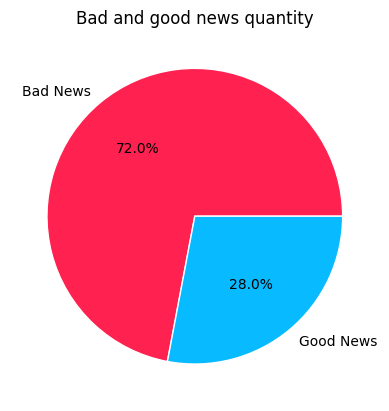

In [24]:
fig, ax = plt.subplots()

ax.pie(to_pie_chart,
       colors=['#FF2250', '#08BAFF'],
       wedgeprops={"linewidth": 1, "edgecolor": "white"},
       labels=['Bad News', 'Good News'],  
       autopct='%1.1f%%'
      )
plt.title(label='Bad and good news quantity')

fig.show()